# Tiền xử lý dữ liệu

In [1]:
import pandas as pd
path = './dataset/pre-processing.csv'
df = pd.read_csv(path)
df.columns = df.columns.str.lower()

In [2]:
df.head()

,no,year,month,day,hour,pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
df = df.drop(columns=['station', 'no', 'month', 'year', 'day', 'hour', 'wd'	])

In [4]:
df.head()

,pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wspm
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0


In [5]:
na_counts = df.isna().sum()
na_counts

pm2.5     925
pm10      718
so2       935
no2      1023
co       1776
o3       1719
temp       20
pres       20
dewp       20
rain       20
wspm       14
dtype: int64

In [6]:
na_percentage = df.isna().mean() * 100
na_percentage

pm2.5    2.638033
pm10     2.047684
so2      2.666553
no2      2.917522
co       5.065024
o3       4.902464
temp     0.057039
pres     0.057039
dewp     0.057039
rain     0.057039
wspm     0.039927
dtype: float64

In [7]:
col_to_drop = na_percentage[na_percentage < 1].index
df_cleaned = df.dropna(subset=col_to_drop)

In [8]:
df_filled = df_cleaned.ffill()

In [9]:
na_percentage = df_filled.isna().mean() * 100
na_percentage

pm2.5    0.0
pm10     0.0
so2      0.0
no2      0.0
co       0.0
o3       0.0
temp     0.0
pres     0.0
dewp     0.0
rain     0.0
wspm     0.0
dtype: float64

# Gán nhãn

In [10]:
import adding_label

for index, row in df_filled.iterrows():
    # Truy cập dữ liệu từ cột tương ứng trong DataFrame
    data_PM25 = row['pm2.5']
    data_PM10 = row['pm10']
    data_SO2 = row['so2']
    data_NO2 = row['no2']
    data_CO = row['co']
    data_O3 = row['o3']


    # Chuyển đổi dữ liệu sang dạng số thực
    PM25 = float(data_PM25)
    PM10 = float(data_PM10)
    SO2 = adding_label.ug_per_m3_to_ppm(float(data_SO2), 64.0648)
    NO2 = adding_label.ug_per_m3_to_ppm(float(data_NO2), 46.0048)
    CO = adding_label.ug_per_m3_to_ppm(float(data_CO), 28.01)
    O3 = adding_label.ug_per_m3_to_ppm(float(data_O3), 47.9982)

    # Tính toán AQI
    AQI = adding_label.calculate_AQI(PM25, PM10, SO2, NO2, CO / 1000, O3 / 1000)

    # Phân loại AQI
    class_aqi = adding_label.class_AQI(AQI)
    df_filled.at[index, 'label'] = class_aqi


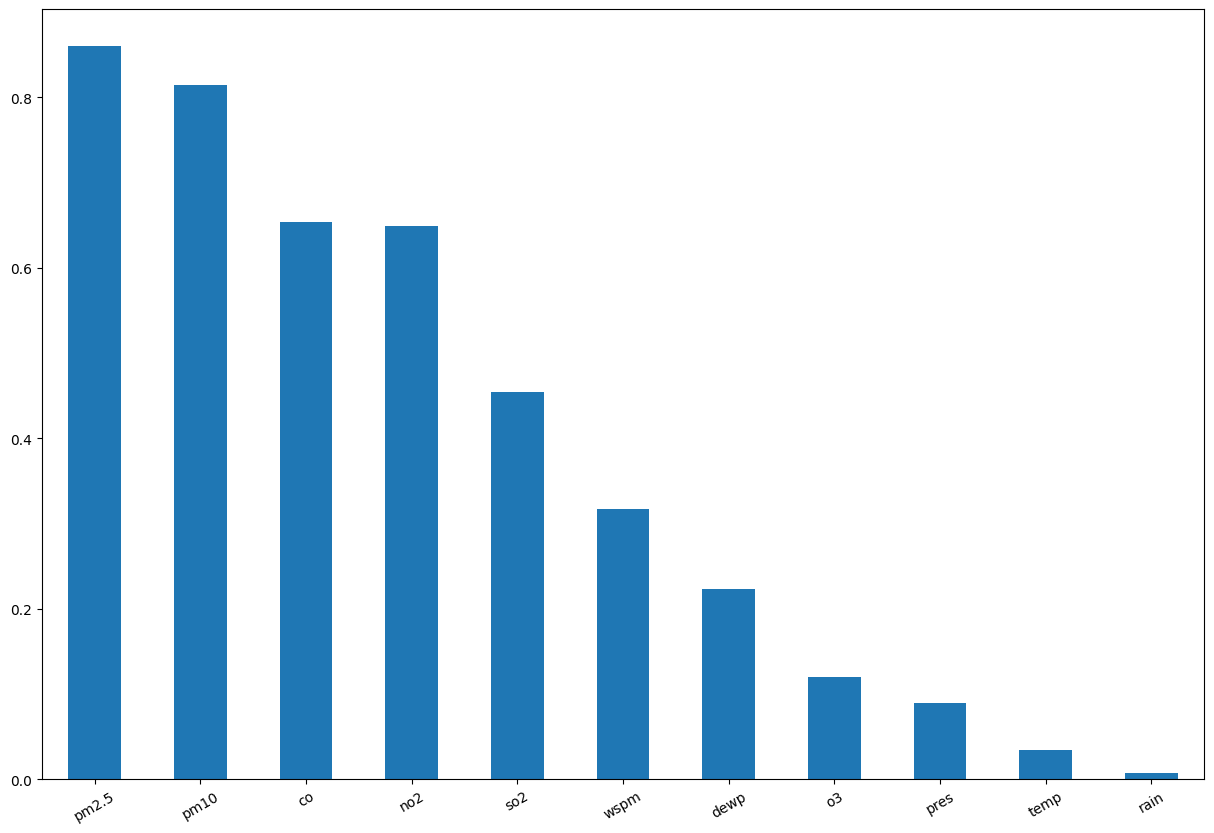

In [11]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,10))
df_filled.corr()['label'].abs().sort_values(ascending=False).drop('label').plot(kind='bar')
plt.xticks(rotation = 30)
plt.show()

In [13]:
df_filled = df_filled.drop(columns=['rain', 'temp', 'pres', 'o3'])

In [14]:
df_filled.to_csv('./dataset/processed.csv', index=False)